# Fix Chinese Font for matplotlib

### 1. 安裝 otf 中文字體

安裝中文字體檔 (ttf/otf)，或將字體檔丟到 matplotlib 的安裝位置 `site-packages/matplotlib/mpl-data/fonts/ttf`，這裡建議直接安裝 __Google Noto Fonts__ (https://www.google.com/get/noto/#sans-hant)

> macOS 中的字體格式是 ttc，而 matplotlib 格式是 ttf，不能直接指定 macOS 字體，需要下載 ttf 類中文字體，再安裝到 macOS 上，但不用另外將字體放到套件資料夾。

```py
# 找出 matplotlib 的安裝位置
import matplotlib
print(matplotlib.__path__)
```

[![](img/google-noto-fonts.png)](https://www.google.com/get/noto/#sans-hant)


### 2. 刪除快取檔案 `~/.matplotlib/fontList.json`，並手動重新建立字型索引


```sh
# 移除 fontList.json
!rm ~/.matplotlib/fontList.json

# Windows
# DEL ~/.matplotlib/fontList.json
```

重新建立字型索引

```py
# matplotlib 不會每次啓動時都會自動重新掃描所有的字體文件並創建字體索引列表，
# 因此在複製完字體文件之後，需要運行下面的語句以重新創建字體索引列表
import matplotlib as mpl
from matplotlib.font_manager import _rebuild
_rebuild()
```

然後查看 `~/.matplotlib/fontList.json` 檔案是否有安裝的中文字型

```
{
    "fname": "/Users/user/Library/Fonts/NotoSansCJKtc-Regular.otf",
    "name": "Noto Sans CJK TC",  # 確認字型名字
    ...
}
```

### 3. Set font family

```py
import matplotlib.pyplot as plt
# 變更中文字型
plt.rcParams['font.sans-serif'].insert(0, 'Noto Sans CJK TC')
# 修復負號顯示問題 (思源黑體可以正常顯示負號，所以不需要加這行)
plt.rcParams['axes.unicode_minus'] = False
```

### 4. (Optional) 直接在 `matplotlibrc` 修改就不用另外指定 `plt.rcParams`

修改 `~/.matplotlib/matplotlibrc` 加入下面幾行

- Linux: `~/.config/matplotlib/matplotlibrc`
- Mac/Windows: `~/.matplotlib/matplotlibrc`

```
# ~/.matplotlib/matplotlibrc
font.family         : sans-serif
font.sans-serif     : Noto Sans CJK TC, Bitstream Vera Sans, Lucida Grande,Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif
```

> 也可以（但不建議）修改 matplotlib 安裝路徑中的 `site-packages/matplotlib/mpl-data/matplotlibrc` 文件，因為重新安裝後設定便會消失)，找到如下兩項，去掉前面的 `#`，並在 `font.sans-serif` 冒號後面加上 `Noto Sans CJK TC`，保存退出。(解決負號 '-' 顯示為方塊的問題：找到 `axes.unicode_minus`，將 `True` 改為 `False`

---

### matplotlib 設定字型起手式

In [1]:
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'].insert(0, 'Noto Sans CJK TC')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
plt.rcParams['font.sans-serif']

['Noto Sans CJK TC',
 'DejaVu Sans',
 'Bitstream Vera Sans',
 'Computer Modern Sans Serif',
 'Lucida Grande',
 'Verdana',
 'Geneva',
 'Lucid',
 'Arial',
 'Helvetica',
 'Avant Garde',
 'sans-serif']

---

### Try

<function matplotlib.pyplot.show(*args, **kw)>

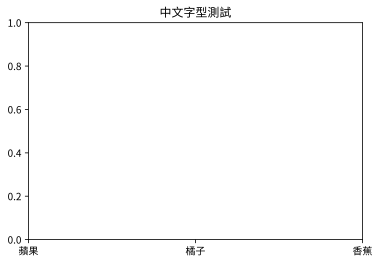

In [3]:
%matplotlib inline

x_labels = ['蘋果', '橘子', '香蕉']
x = [0, 1, 2]

plt.xticks(x, x_labels)
plt.title('中文字型測試')
plt.show